<a href="https://colab.research.google.com/github/Strojove-uceni/104/blob/main/104_Machine_learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo 01](https://staff.utia.cas.cz/novozada/ml1/104_.png)

**Course website:** [zoi.utia.cas.cz/ROZ2](http://zoi.utia.cas.cz/ROZ2/studijni-materialy)


# Part 1: PCA - Principal Component Analysis


## Goal
**PCA** finds a new set of dimensions such that all the dimensions are *orthogonal* ($ \Rightarrow $ lienarly independent) and ranked according to the variance of data along them.

**The rules for finding the transformation:**

*   The transformed features are linearly independent
*   Dimensionality can be reduced by taking only the dimensions with the highest importance
*   Those newly found dimensions should minimize the projection error
*   The projected points should have maximum spread, i.e. maximum variance

## Theory

### Variance
How much variation or spread the data has?

$$
\begin{aligned}
Var(X) = \frac{1}{n} \sum{(X_i - \bar{X})^2}
\end{aligned}
$$
### Covariance Matrix
Indicates the level to which two cariables vary together

$$
\begin{aligned}
Cov(X,Y) = \frac{1}{n} \sum{(X_i - \bar{X})(Y_i - \bar{Y})^T} \\
Cov(X,X) = \frac{1}{n} \sum{(X_i - \bar{X})(X_i - \bar{X})^T}
\end{aligned}
$$

### Eigenvectors and Eigenvalues
The eigenvectors point in the direction of the maxim variance, and the corresponding eigenvalues indicate the importance of its corresponding eigenvector.

$$
\begin{aligned}
A \overrightarrow{x} = \lambda \overrightarrow{x}
\end{aligned}
$$

### Algorithm
*   Substract the mean from X
*   Calculate $Cov(X,X)$
*   Calculate eigenvectors and eigenvalues in decreasing order
*   Choose first $k$ eigenvectors and that will be the new $k$ dimensions
*   Transform the original $n$ dimensional data points into $k$ dimensions 
    *   = Projections with dot product

## Code

In [1]:
import numpy as np

class PCA:

  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, X):
    # mean
    self.mean = np.mean(X, axis=0)
    X = X - self.mean
    # covariance
    # row  = 1 sample, columns = feature >> we have to transform because of np.cov()
    cov = np.cov(X.T)
    # eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    #  v[:, i]
    # sort eigenvectors
    eigenvectors = eigenvectors.T    
    idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]    
    # store first n eigenvectors
    self.components = eigenvectors[0:self.n_components]    

  def transform(self, X):
    X = X - self.mean
    return np.dot(X, self.components.T)

### Testing on Iris Data Set
* [webside of the dataset](https://archive.ics.uci.edu/ml/datasets/iris)

<img src="https://staff.utia.cas.cz/novozada/ml1/iris.jpg">

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


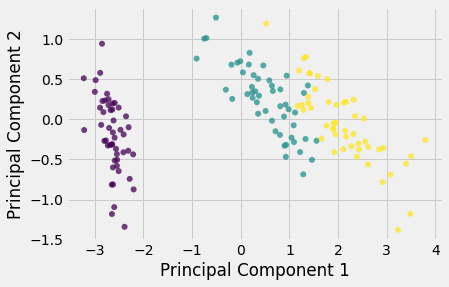

In [2]:
# Imports
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('fivethirtyeight')

# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.75)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### What about the transformation to one dimension?

Shape of X: (150, 4)
Shape of transformed X: (150, 1)


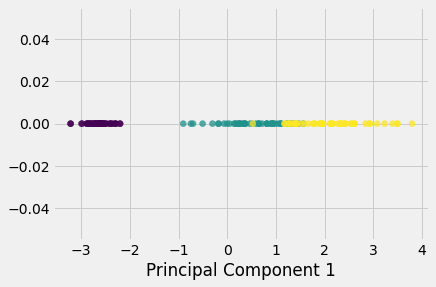

In [3]:
# Imports
import matplotlib.pyplot as plt
from sklearn import datasets

# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 1 primary principal components
pca = PCA(1)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]

plt.scatter(x1,np.zeros(x1.size), c=y, alpha=0.75)

plt.xlabel("Principal Component 1")
plt.show()

### Testing on Breast
* [webside of the dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

<img src="https://staff.utia.cas.cz/novozada/ml1/breast.jpg">

In [4]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
cancer.keys()
print(cancer.DESCR[27:3130])


Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Rad

Shape of X: (569, 30)
Shape of transformed X: (569, 2)


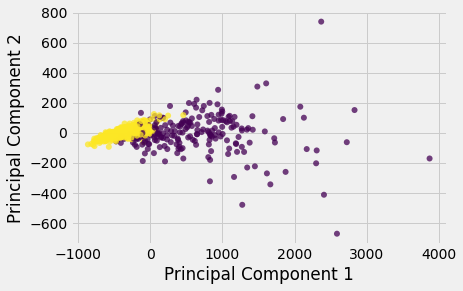

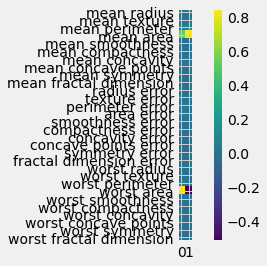

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
#
# Load the data set
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.75)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
components = pca.components
plt.imshow(components.T)
plt.yticks(range(len(bc.feature_names)), bc.feature_names)
plt.colorbar()

# Part 2: SVD - Singular Value Decomposition

$$
\begin{aligned}
A = U \Sigma V^T
\end{aligned}
$$
where:
*   $A...m \times n$ real matrix 
*   $U...m \times m$ real orthogonal matrix
*   $\Sigma...m \times n$ rectangular diagonal matrix with non-negative real numebrs on diagonal
*   $V...n \times n$ real orthogonal matrix


If $A$ is real $\Rightarrow$ $U$ and $V$ can also be guaranteed to be real orthogonal matrices and the **SVD**:

$$
\begin{aligned}
A = U \Sigma V^T
\end{aligned}
$$
⚓ To be clear for 2D:
*   $s_{ii}$ are the singular values of $a$
*   The rows of $V^T$ are the eigenvectors of $A^TA$
*   The colums of $U$ are the eigenvectors of $AA^T$
*   The corresponding eigenvalues are given by $s_{ii}^2$



## Explanation

### Help function for visualization

In [6]:
# Help function for visualization
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
plt.style.use('fivethirtyeight')

def show_matrix(T, ax=None):  
  vectorsColors=["#FFD800", "#00CD79"]
  # Unit circle
  x = np.linspace(-1, 1, 1000)
  y = np.sqrt(1 - (x ** 2))

  # Modified unit circle (separate negative and positive parts)
  x1 = T[0, 0] * x + T[0, 1] * y
  y1 = T[1, 0] * x + T[1, 1] * y
  x1_neg = T[0, 0] * x - T[0, 1] * y
  y1_neg = T[1, 0] * x - T[1, 1] * y

  # Vectors
  vecs = np.array([T[:, 0], T[:, 1]])

  if ax == None:
    plt.figure(figsize=(4, 4))
    ax = plt.axes()
  ax.axvline(x=0, color="#d6d6d6", zorder=0)
  ax.axhline(y=0, color="#d6d6d6", zorder=0)

  plotVectors(vecs, ax, cols=vectorsColors, alpha=1)

  ax.plot(x1, y1, "#F57F53", linewidth=4, alpha=1)
  ax.plot(x1_neg, y1_neg, "#F57F53", linewidth=4, alpha=1)
  ax.axis("equal")
  return ax

def plotVectors(vecs, ax, cols, alpha=1):  
  ax.quiver(
    np.zeros(vecs.shape[0]),
    np.zeros(vecs.shape[0]),
    vecs[:, 0],
    vecs[:, 1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=cols,
    width=0.018,
    alpha=alpha,
  )


### Play with unit circle
The unit circle and the basis vectors before the transformation:

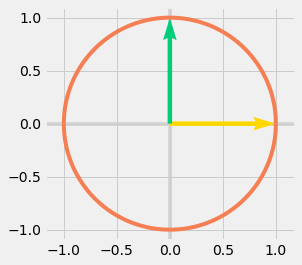

In [7]:
I = np.array([[1, 0],[0, 1]])
show_matrix(I);

Plot the transformed unit circle and the basis vectors:

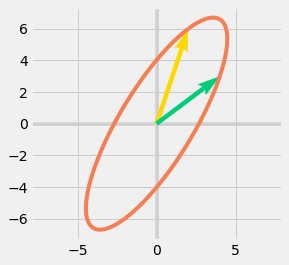

In [8]:
A = np.array([[2, 4],[6, 3]])
show_matrix(A);

You can calculate the SVD of $A$ using Numpy but be careful:

`u, s vh = np.linalg.svd(a)`
*   $A = $ `a`
*   $U = $ `u`
*   $\Sigma = $ `np.diag(s)`
*   $V^T = $ `vh`

In [9]:
u, s, vh = np.linalg.svd(A)
print(f'A = \n {np.round(A, 3)}')
print(f'u = \n {np.round(u, 3)}')
print(f's = \n {np.round(s, 3)}')
print(f'vh = \n {np.round(vh, 3)}')

A = 
 [[2 4]
 [6 3]]
u = 
 [[-0.519 -0.855]
 [-0.855  0.519]]
s = 
 [7.718 2.332]
vh = 
 [[-0.799 -0.601]
 [ 0.601 -0.799]]


The effect of $V^T\Rightarrow$ unit circle and the basis vectors will be rotated

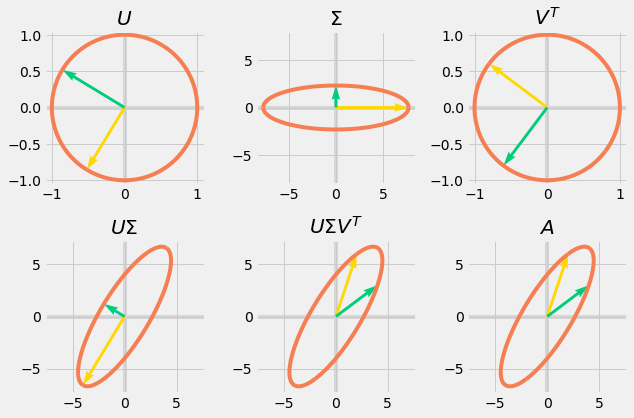

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches((9,6))
show_matrix(u, ax[0,0]);
ax[0,0].title.set_text('$U$')
show_matrix(np.diag(s), ax[0,1]);
ax[0,1].title.set_text('$\Sigma$')
show_matrix(vh, ax[0,2]);
ax[0,2].title.set_text('$V^T$')
show_matrix(u @ np.diag(s), ax[1,0]);
ax[1,0].title.set_text('$U\Sigma$')
show_matrix(u @ np.diag(s) @ vh, ax[1,1]);
ax[1,1].title.set_text('$U\Sigma V^T$')
show_matrix(A, ax[1,2]);
ax[1,2].title.set_text('$A$')
fig.tight_layout(pad=1.0)

*   The effect of $U\Rightarrow$ unit circle and the basis vectors will be rotated
*   The effect of $\Sigma\Rightarrow$ unit circle and the basis vectors will be scaled
*   The effect of $V^T\Rightarrow$ unit circle and the basis vectors will be rotated and flipped

### ✌ SVD reminds me of Eigendecomposition of a matrix - no wonder 

$$
\begin{aligned}
A = Q \Lambda Q^{-1}
\end{aligned}
$$

In [11]:
lam, Q = np.linalg.eig(A)
print(f'A = \n {np.round(A, 3)}')
print(f'lam = \n {np.round(lam, 3)}')
print(f'Q = \n {np.round(Q, 3)}')
print(f'inv(Q) = \n {np.round(np.linalg.inv(Q), 3)}')

A = 
 [[2 4]
 [6 3]]
lam = 
 [-2.424  7.424]
Q = 
 [[-0.671 -0.593]
 [ 0.742 -0.805]]
inv(Q) = 
 [[-0.821  0.606]
 [-0.757 -0.684]]


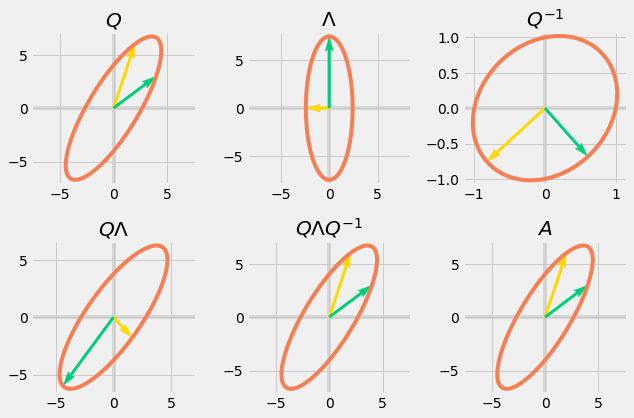

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches((9,6))
show_matrix(A, ax[0,0]);
ax[0,0].title.set_text('$Q$')
show_matrix(np.diag(lam), ax[0,1]);
ax[0,1].title.set_text('$\Lambda$')
show_matrix(np.linalg.inv(Q), ax[0,2]);
ax[0,2].title.set_text('$Q^{-1}$')
show_matrix(Q @ np.diag(lam), ax[1,0]);
ax[1,0].title.set_text('$Q\Lambda$')
show_matrix(Q @ np.diag(lam) @ np.linalg.inv(Q), ax[1,1]);
ax[1,1].title.set_text('$Q\Lambda Q^{-1}$')
show_matrix(A, ax[1,2]);
ax[1,2].title.set_text('$A$')
fig.tight_layout(pad=1.0)

### ☝ since the general matrix $A$ is not symmetric, its eigenvectors are not orthogonal

In [13]:
print(f'Their dot product is not equal to zero: {Q[:,0] @ Q[:,1]}')
print(f'The same with using NumPy dot product: {np.dot(Q[:,0], Q[:,1])}')

Their dot product is not equal to zero: -0.19900743804199772
The same with using NumPy dot product: -0.19900743804199772


## Relation between PCA and SVD

### Assume that we want to calculate PCA
We usually first calculate the covariance matrix $M^TM$

This matrix is: 
  -  symmetric
  -  real-valued

➡ an eigendecomposition & SVD are guaranteed to exist
$$
\begin{aligned}
M^TM = (U \Sigma V^T)^T(U \Sigma V^T) = V \Sigma^T U^T U \Sigma V^T
\end{aligned}
$$

since $U$ and $V$ are orthogonal, we have $U^TU=𝙸$

$$
\begin{aligned}
M^TM = V \Sigma^T \Sigma V^T
\end{aligned}
$$

As $\Sigma^T\Sigma$ is a diagonal $n \times n$ matrix, we can see that the eigenvalues of the PCA decomposition are just the squares of the singular values of the singular value decomposition.

Likewise, we can see that the eigenvectors of the PCA decomposition are the singular vectors of the SVD. It is thus possible to calculate a PCA using an SVD.


In [14]:
import time
import numpy as np
from sklearn import datasets
data = datasets.load_iris()
# data = datasets.load_breast_cancer()
X = data.data

# X = np.tile(X,(100,1))
print(X.shape)

# X = np.random.randint(100, size=(6, 12))
# print(X)

#  How many components we want
n_components = 4 

mean = np.mean(X, axis=0)
X = X - mean

# ************* PCA - the standard way
start_PCA = time.time()
# covariance
cov = np.cov(X.T)
# eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov)
# sort eigenvectors
eigenvectors = eigenvectors.T    
idxs = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]    
# store first n eigenvectors
PC_1 = eigenvectors[0:n_components]
V_1 = eigenvalues[0:n_components] 

start_SVD = time.time()
# % construct the matrix Y
Y = X / np.sqrt(X.shape[0]-1);
# % SVD does it all
[u,S,PC_2] = np.linalg.svd(Y);
# % calculate the variances
PC_2 = PC_2[:n_components,:]
V_2 = S * S
V_2 = V_2[:n_components]
end = time.time()
print(f'\nPCA counted with standard way: \n {np.round(PC_1,3)}')
print(f'\nPCA counted with SVD way: \n {np.round(PC_2,3)}')
print(f'\nVariances with standard way: \n {np.round(V_1,3)}')
print(f'\nVariances counted with SVD way: \n {np.round(V_2,3)}')

print(f'\nAbout the time:')
print(f'PCA take: {start_SVD - start_PCA:0.6f}')
print(f'SVD take: {end - start_SVD:0.6f}')

(150, 4)

PCA counted with standard way: 
 [[ 0.361 -0.085  0.857  0.358]
 [-0.657 -0.73   0.173  0.075]
 [-0.582  0.598  0.076  0.546]
 [ 0.315 -0.32  -0.48   0.754]]

PCA counted with SVD way: 
 [[ 0.361 -0.085  0.857  0.358]
 [-0.657 -0.73   0.173  0.075]
 [ 0.582 -0.598 -0.076 -0.546]
 [ 0.315 -0.32  -0.48   0.754]]

Variances with standard way: 
 [4.228 0.243 0.078 0.024]

Variances counted with SVD way: 
 [4.228 0.243 0.078 0.024]

About the time:
PCA take: 0.001329
SVD take: 0.000998


## Applications

### Dimensionality reduction

<img src="https://www.utia.cas.cz/images/ml1/rgb.png" width="300px" align="right">

We can consider an image like an N-dimensional matrix, where each dimension represents a channel of the image and the position in a matrix represents a particular pixel. In a grayscale image with PNG format, each pixel has a value between 0 (black) and 1 (white).

**Steps:**

1.   Use the imread() function to load a grayscale image from the server to the matrix
2.   Decompose the matrix with SVD 
3.   Reconstruct the image using anly the first 30 singular values
4.   Show the differences

Mean difference : 0.029472
which corresponds to 7.810010 luminance values
Space reduction:
- original gray image: 640 x 640 = 409600
- if we use only 40 singular values: 40 x (1+640+640) = 51240
- - it is 87.490 % reduction


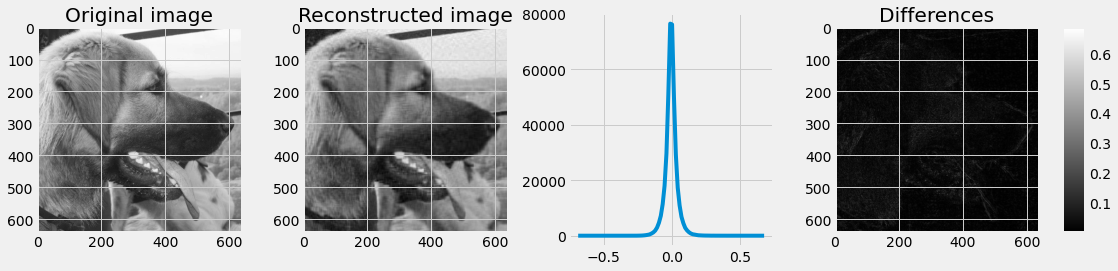

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1 - laod
mat = plt.imread("https://staff.utia.cas.cz/novozada/ml1/dog.png")
mat = mat[:,:,1]

# Step 2 - SVD
U, s, VT = np.linalg.svd(mat)
Sigma = np.zeros((mat.shape[0], mat.shape[1]))
# Be careful - if the image is rectangular (mat.shape[0] != mat.shape[1])
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

# Step 3 - Reconstruction of the matrix using the first 40 singular values
k = np.arange(40)
# k = np.arange(5,100)

# If we want to use {k+1, k+2,...,k+40} singular values
mat_approx = U[:, k] @ Sigma[np.ix_(k,k)] @ VT[k, :]
# print(f'We use this singular values: \n {k}')
diff = (mat - mat_approx)
abs_diff = np.abs(diff)
mean_diff = np.mean(abs_diff)
max_diff = np.max(abs_diff)

print(f'Mean difference : {mean_diff:.6f}')
print(f'which corresponds to {mean_diff/(np.max(mat)/265):.6f} luminance values')
print(f'Space reduction:')
space_before = 640**2
space_after = len(k)*(1+640*2)
print(f'- original gray image: 640 x 640 = {space_before}')
print(f'- if we use only {len(k)} singular values: {len(k)} x (1+640+640) = {space_after}')
print(f'- - it is {(1 - space_after / space_before) * 100:.3f} % reduction')

histogram, bin_edges = np.histogram(diff, bins=100, range=(-max_diff, max_diff))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Original image")
ax2.imshow(mat_approx, cmap='gray')
ax2.set_title("Reconstructed image")
ax3.plot(bin_edges[0:-1], histogram)

img4 = ax4.imshow(np.abs(mat - mat_approx), cmap='gray')
ax4.set_title("Differences")
cax = fig.add_axes([ax4.get_position().x1+0.02,ax4.get_position().y0,0.02,ax4.get_position().height])
fig.colorbar(img4, cax, orientation='vertical')
plt.show()

The original matrix is $640\times640$. So we need to store $640 * 640 = 409600$ values. After SVD each $u_i$ and $v^T_i$ has $640$ elements. To be able to reconstruct the image using the first $40$ singular values we only need to keep the first $40$ $\sigma_{ii}$, $u_i$, and $v^T_i$ which means storing $40*(1+640+640) = 51240$ values. Memory size has decreased by $87\%$. Don't forget we have three channels.

To understand how the image information is stored in each component, we can study a much simpler image. 

**Steps:**

1.   Use the imread() function to load a binary image from the server to the matrix 
2.   Decompose the matrix with SVD 
3.   Show the differences by reconstruction with different numbers of singular values

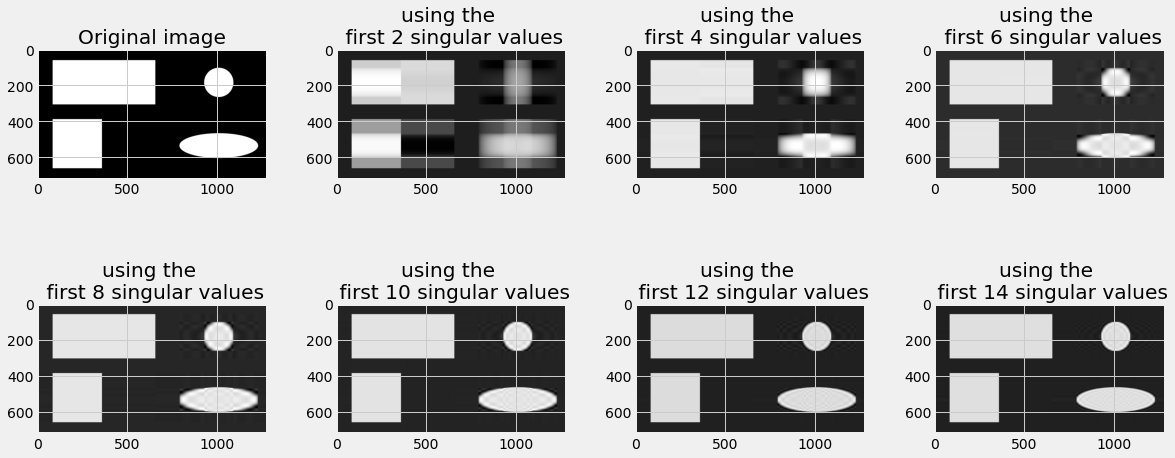

In [16]:
mat = plt.imread("https://staff.utia.cas.cz/novozada/ml1/svd_parts.png")
mat = mat[:,:,1]

# SVD 
# u, s vh = np.linalg.svd(a)
U, s, VT = np.linalg.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 4, figsize=(18,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Original image")

for i in range(1, 8):
    k = i * 2
    # Reconstruction of the matrix using the first k singular values
    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

    axes[i // 4, i % 4].imshow(mat_approx, cmap='gray')
    axes[i // 4, i % 4].set_title("using the \n first {} singular values".format(k))

plt.show()

**What will the output look like if we use only one of the first six components each time?**

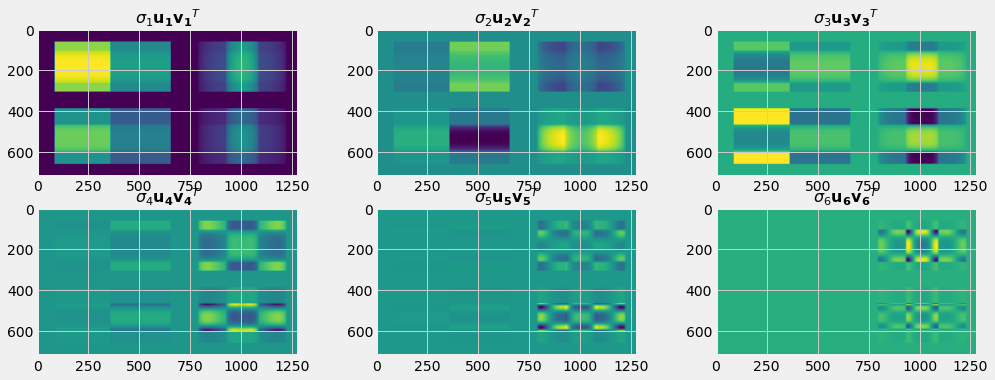

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(15,6))
plt.subplots_adjust(wspace=0.3, hspace=0.05)

for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    #mat_i[mat_i < 1e-8] = 0
    axes[i // 3, i % 3].imshow(mat_i)
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), fontsize=16)
    
plt.show()

### Eigenfaces

We will use Olivetti Dataset taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge.

In [18]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.keys()
print(faces.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (w

**We can show first 5 subjects from this database here:**

(400, 64, 64)


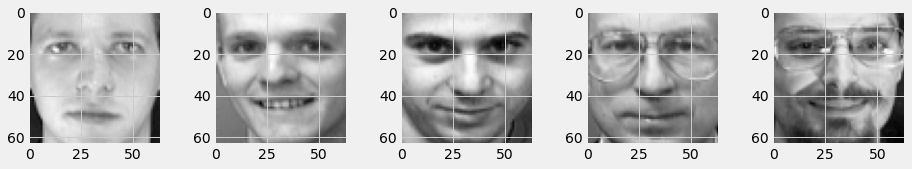

In [19]:
from sklearn import datasets
data = datasets.fetch_olivetti_faces()
imgs = data.images
print(imgs.shape)

fig, axes = plt.subplots(1, 5, figsize=(14, 8))
plt.subplots_adjust(wspace=0.4)

for i in range(0, 5):
    axes[i].imshow(imgs[i*40], cmap='gray')
plt.show()

**In this case, we will store the data in a different way:**
We reshape each image in a column vector: $64 \times 64 \Rightarrow 4096 \times 1=f_i$ and put these $400$ columns together to the matrix $M = [f_1, f_2,...,f_{400}] = 4096\times 400$.

In [20]:
# for i == 1 >>
img = imgs[1]
print(f'before >> \n {img}\n')
print(f'after >> \n {img.reshape((-1, imgs.shape[1]*imgs.shape[2])).T}')

before >> 
 [[0.45454547 0.47107437 0.5123967  ... 0.19008264 0.18595041 0.18595041]
 [0.446281   0.48347107 0.5206612  ... 0.21487603 0.2107438  0.2107438 ]
 [0.49586776 0.5165289  0.53305787 ... 0.20247933 0.20661157 0.20661157]
 ...
 [0.77272725 0.78099173 0.7933884  ... 0.1446281  0.1446281  0.1446281 ]
 [0.77272725 0.7768595  0.7892562  ... 0.13636364 0.13636364 0.13636364]
 [0.7644628  0.7892562  0.78099173 ... 0.15289256 0.15289256 0.15289256]]

after >> 
 [[0.45454547]
 [0.47107437]
 [0.5123967 ]
 ...
 [0.15289256]
 [0.15289256]
 [0.15289256]]


In [21]:
# for all images >>
M = imgs.reshape((-1, imgs.shape[1]*imgs.shape[2])).T
M.shape

(4096, 400)

**How to get a certain image from the matrix $M$?**

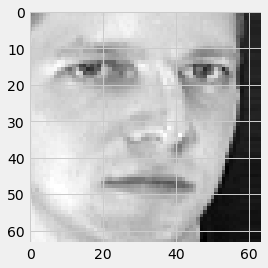

In [22]:
x = np.zeros((400, 1))
x[1] = 1
y = M @ x
plt.imshow(y.reshape((64,64)), cmap='gray')
plt.show()

**Now we can decompose our matrix $M$ with SVD:**
$$
\begin{aligned}
M = U \Sigma V^T
\end{aligned}
$$
To recall - each column of the matrix $U$ is eigenvector - we can reshape it to the same shape as the image and see what we get back.

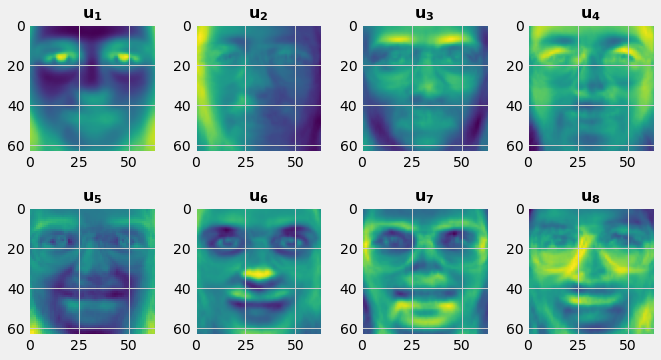

In [23]:
U, s, VT = np.linalg.svd(M)

fig, axes = plt.subplots(2, 4, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.1)

for i in range(0, 8):
    axes[i // 4, i % 4].imshow(U[:, i].reshape((64,64)))
    axes[i // 4, i % 4].set_title("$\mathbf{{u_{0}}}$".format(i+1), fontsize=16)
    
plt.show()

The vectors $u_i$ are called the ***eigenfaces*** and can be used for face recognition. As you see, each eigenface captures some information of the image vectors. For example, $u_1$ is mostly about the eyes, or $u_6$ captures part of the nose. 

We can also use only first several basic vectors $u_i$ to reconstruct one of the images:

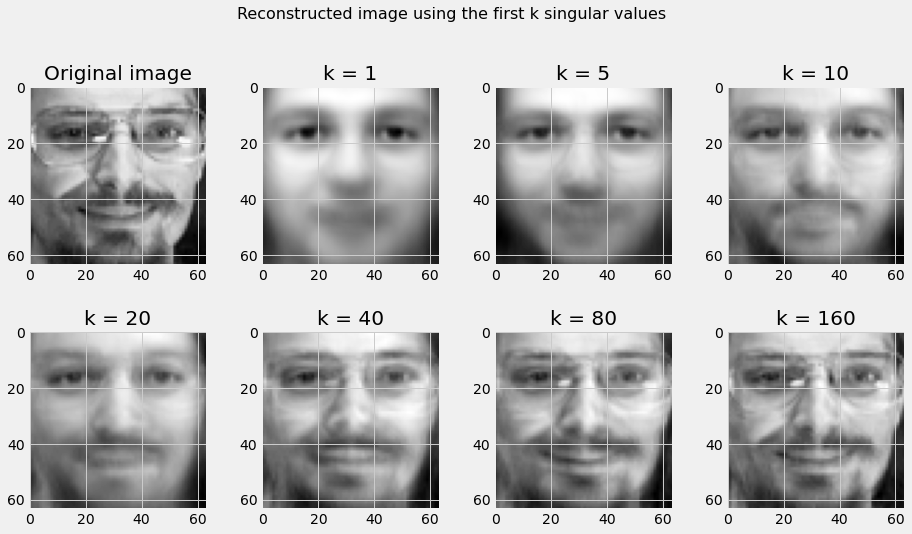

In [24]:
x= np.zeros((400, 1))
face_id = 160
x[face_id, 0] = 1
Sigma = np.zeros((M.shape[0], M.shape[1]))
Sigma[:min(M.shape[0], M.shape[1]), :min(M.shape[0], M.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle("Reconstructed image using the first k singular values", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

axes[0, 0].imshow(imgs[face_id], cmap='gray')
axes[0, 0].set_title("Original image")

k_list = [1, 5, 10, 20, 40, 80, 160]
for i in range(1, 8):
    # Reconstruction of the matrix using the first k singular values
    k = k_list[i-1]     

    mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :] @ x

    axes[i // 4, i % 4].imshow(mat_approx.reshape((64,64)), cmap='gray')
    axes[i // 4, i % 4].set_title("k = {}".format(k))

plt.show()

**Here are the reconstructions with the particular eigenface:**

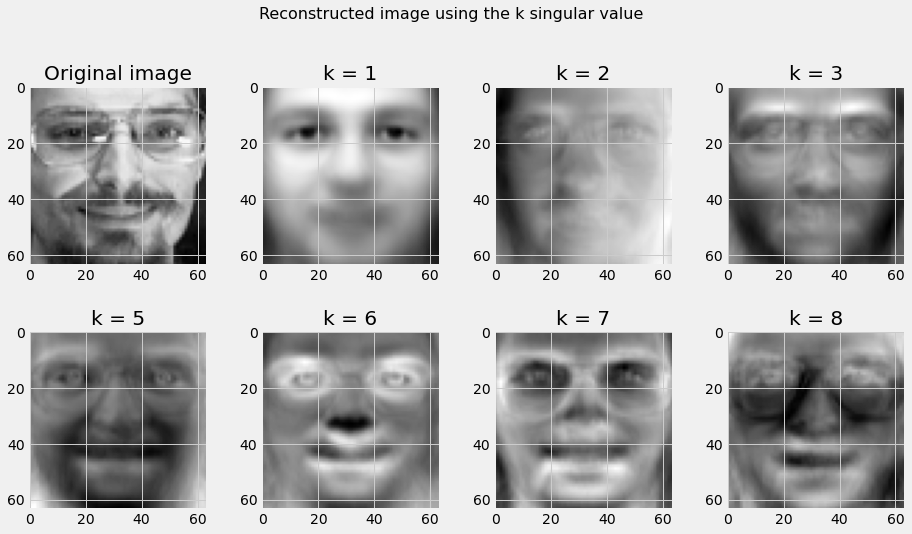

In [25]:
x= np.zeros((400, 1))
face_id = 160
x[face_id, 0] = 1
Sigma = np.zeros((M.shape[0], M.shape[1]))
Sigma[:min(M.shape[0], M.shape[1]), :min(M.shape[0], M.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle("Reconstructed image using the k singular value", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

axes[0, 0].imshow(imgs[face_id], cmap='gray')
axes[0, 0].set_title("Original image")

k_list = [1, 2, 3, 5, 6, 7, 8]
for i in range(1, 8):
    # Reconstruction of the matrix using the first k singular values
    k = k_list[i-1]     

    mat_approx = U[:, k-1:k] @ Sigma[k-1:k, k-1:k] @ VT[k-1:k, :] @ x

    axes[i // 4, i % 4].imshow(mat_approx.reshape((64,64)), cmap='gray')
    axes[i // 4, i % 4].set_title("k = {}".format(k))

plt.show()

# Part 3: LDA - Linear Discriminant Analysis

## Goal
**Linear Discriminant Analysis** is a very common technique used for reducing the dimensions by transforming the features from higher dimensional space to a space with lower dimensions. We use LDA to solve the supervised classification problems in Machine Learning as a preprocessing step.

<img src="https://staff.utia.cas.cz/novozada/ml1/pcalda0.png">

**Differences:**

*   PCA:
    *   Unsupervised Learning
    *   Finding the component axas that maximaze the variance of our data (globaly)
*   LDA:
    *   Supervised Learning (we have the labeles of the classes)
    *   Maximazing the component axes for class-separation

## Theory

### Within-classes scatter matrix
$$ \begin{aligned} S_W = \sum_{c} S_c \end{aligned} $$
$$ \begin{aligned}
S_c = \sum_{i\in c}(x_i - \bar{x}_c) \cdot (x_i - \bar{x}_c)^T
\end{aligned} $$

### Between-classes scatter matrix
$$ \begin{aligned}
S_B = \sum_{c} n_c \cdot (\bar{x}_c - \bar{x}) \cdot (\bar{x}_c - \bar{x})^T
\end{aligned} $$

### Algorithm

*   Calculate $S_B$
*   Calculate $S_W$
*   Calculate eigenvectors and eigenvalues of $S_W^{-1}S_B$
*   Sort the eigenvectors according to their eigenvalues in desreasig order
*   Choose first $k$ eigenvectors and this will be the new dimensions (linear discriminants)
*   Transform the original $n$ dimensional data points into $k$ dimensions 
    *    projections with dot product



In [26]:
class LDA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.linear_discriminants = None

  def fit(self, X, y):
    n_features = X.shape[1]
    class_labels = np.unique(y)    

    mean_overall = np.mean(X, axis=0)
    SW = np.zeros((n_features, n_features))
    SB = np.zeros((n_features, n_features))
    for c in class_labels:
      X_c = X[y == c]
      mean_c = np.mean(X_c, axis=0)
      # (4, n_c) * (n_c, 4) = (4,4) -> transpose
      SW += (X_c - mean_c).T.dot((X_c - mean_c))

      # (4, 1) * (1, 4) = (4,4) -> reshape
      n_c = X_c.shape[0]
      mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
      SB += n_c * (mean_diff).dot(mean_diff.T)

    # Determine SW^-1 * SB
    A = np.linalg.inv(SW).dot(SB)
    # Get eigenvalues and eigenvectors of SW^-1 * SB
    eigenvalues, eigenvectors = np.linalg.eig(A)
    # -> eigenvector v = [:,i] column vector, transpose for easier calculations
    # sort eigenvalues high to low
    eigenvectors = eigenvectors.T
    idxs = np.argsort(abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]
    # store first n eigenvectors
    self.linear_discriminants = eigenvectors[0 : self.n_components]

  def transform(self, X):
    # project data
    return np.dot(X, self.linear_discriminants.T)

**Let's test it on the Iris + Breast databases and compare with PCA**

Shape of X: (150, 4)
Shape of transformed X via LDA: (150, 2)
Shape of transformed X via PCA: (150, 2) 



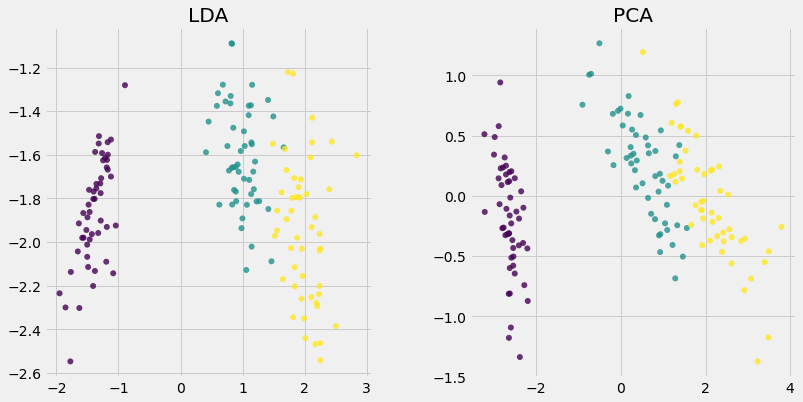

In [27]:
# Imports
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
X, y = data.data, data.target

# Project the data onto the 2 primary linear discriminants
lda = LDA(2)
pca = PCA(2)
lda.fit(X, y)
pca.fit(X)
X_projected_lda = lda.transform(X)
X_projected_pca = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X via LDA:", X_projected_lda.shape)
print("Shape of transformed X via PCA:", X_projected_pca.shape,"\n")

x1_lda, x2_lda = X_projected_lda[:, 0], X_projected_lda[:, 1]
x1_pca, x2_pca = X_projected_pca[:, 0], X_projected_pca[:, 1]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
plt.subplots_adjust(wspace=0.3, hspace=0.2)
ax1.scatter(-x1_lda, x2_lda, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
ax2.scatter(x1_pca, x2_pca, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
ax1.set_title("LDA")
ax2.set_title("PCA")
plt.show()


Shape of X: (569, 30)
Shape of transformed X via LDA: (569, 2)
Shape of transformed X via PCA: (569, 2) 



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


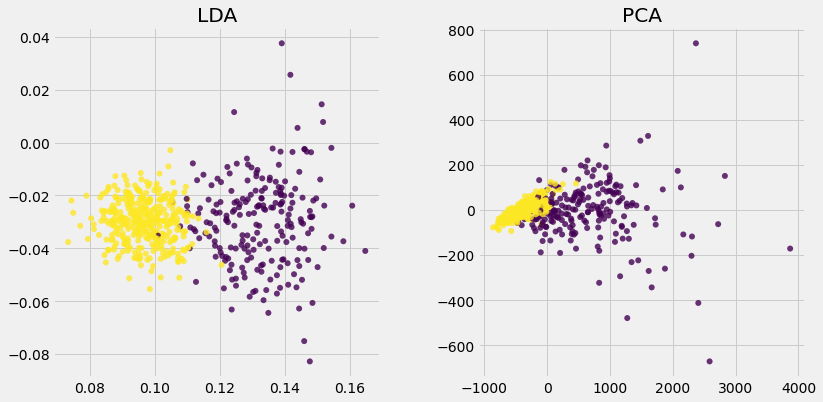

In [28]:
# Imports
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Project the data onto the 2 primary linear discriminants
lda = LDA(2)
pca = PCA(2)
lda.fit(X, y)
pca.fit(X)
X_projected_lda = lda.transform(X)
X_projected_pca = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X via LDA:", X_projected_lda.shape)
print("Shape of transformed X via PCA:", X_projected_pca.shape,"\n")

x1_lda, x2_lda = X_projected_lda[:, 0], X_projected_lda[:, 1]
x1_pca, x2_pca = X_projected_pca[:, 0], X_projected_pca[:, 1]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
plt.subplots_adjust(wspace=0.3, hspace=0.2)
ax1.scatter(-x1_lda, x2_lda, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
ax2.scatter(x1_pca, x2_pca, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
ax1.set_title("LDA")
ax2.set_title("PCA")
plt.show()

**The same comparison on Digits**
* [webside of the dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)

Shape of X: (1797, 64)
Shape of transformed X via LDA: (1797, 9)
Shape of transformed X via PCA: (1797, 2) 



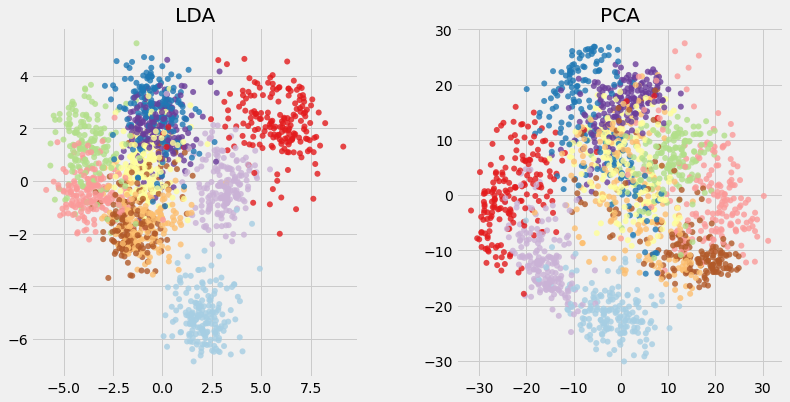

In [29]:
# Imports
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X, y = datasets.load_digits(return_X_y=True)

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
X_projected_lda = clf.transform(X)

# ! inv(Singular matrix) !
# lda = LDA(2)
# lda.fit(X,y)
# X_projected_lda = lda.transform(X)

pca = PCA(2)
pca.fit(X)
X_projected_pca = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X via LDA:", X_projected_lda.shape)
print("Shape of transformed X via PCA:", X_projected_pca.shape,"\n")

x1_lda, x2_lda = X_projected_lda[:, 0], X_projected_lda[:, 1]
x1_pca, x2_pca = X_projected_pca[:, 0], X_projected_pca[:, 1]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
plt.subplots_adjust(wspace=0.3, hspace=0.2)
ax1.scatter(-x1_lda, x2_lda, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("Paired", len(np.unique(y))))
ax2.scatter(x1_pca, x2_pca, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("Paired", len(np.unique(y))))
ax1.set_title("LDA")
ax2.set_title("PCA")
plt.show()

# Part 4: Another dimensionality reduction technique: t-SNE
[demonstration of use](https://distill.pub/2016/misread-tsne/)
